In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier

In [2]:
# lets create 1000 data point

data = {
    'income': np.random.randint(1000, 10000, 1000),
    'credit_score': np.random.randint(300, 850, 1000),
    'defaulted': np.random.randint(0, 2, 1000)
}

df = pd.DataFrame(data)
df.head()

# here 0 means not defaulted and 1 means defaulted
# Predict if a person will default or not based on income and credit score

,income,credit_score,defaulted
0,8092,344,1
1,6316,578,0
2,9083,359,1
3,6050,410,0
4,8661,370,1


In [3]:
# splitting the data into training and testing sets
X = df[['income', 'credit_score']]
y = df['defaulted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# lets check the shape of the data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

Best k: 7 with accuracy: 0.56


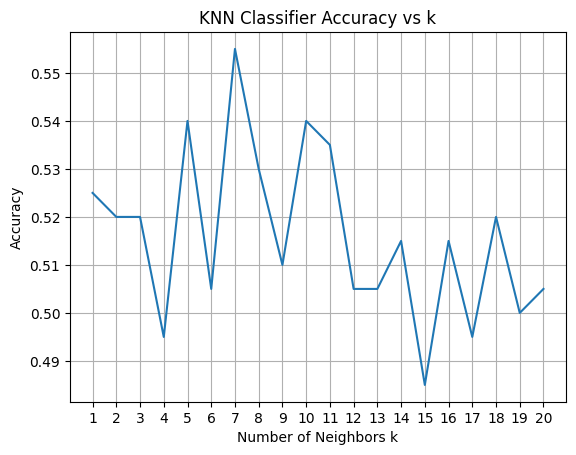

In [5]:
accuracy_list = []
# trying different values of k to find the best one
for k in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)
    accuracy_list.append((k, accuracy))


# finding the best k
best_k, best_accuracy = max(accuracy_list, key=lambda x: x[1])
print(f"Best k: {best_k} with accuracy: {best_accuracy:.2f}")

# lets plot the accuracy vs k
import matplotlib.pyplot as plt
k_values, accuracies = zip(*accuracy_list)
plt.plot(k_values, accuracies)
plt.xlabel('Number of Neighbors k')
plt.ylabel('Accuracy')
plt.title('KNN Classifier Accuracy vs k')
plt.xticks(k_values)
plt.grid()
plt.show()

In [13]:
# lets create the model
knn = KNeighborsClassifier(n_neighbors=5,metric='cosine')
knn.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'cosine'
,metric_params,None
,n_jobs,None


In [11]:
# predicting the test set
# y_pred = knn.predict(X_test)

# checking the accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.525

In [10]:
# lets create the copy of x_test to see the predictions
pred_df = X_test.copy()
pred_df['actual'] = y_test
pred_df['predicted'] = y_pred
pred_df.head(10)

,income,credit_score,actual,predicted
521,3650,336,0,0
737,9561,337,1,0
740,6774,315,0,0
660,2698,433,0,0
411,5137,703,1,1
678,6795,823,1,0
626,3746,759,1,1
513,1445,429,0,1
859,1673,765,0,0
136,5968,612,0,0


In [15]:
# lets save it as a pickle file
import pickle
with open('knn_model.pkl', 'wb') as f:
    pickle.dump(knn, f)

In [6]:
# lets split data into three parts - training, validation and testing
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2

In [7]:
# checking the shape of the data
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((600, 2), (200, 2), (200, 2), (600,), (200,), (200,))

Best k: 6 with accuracy: 0.56


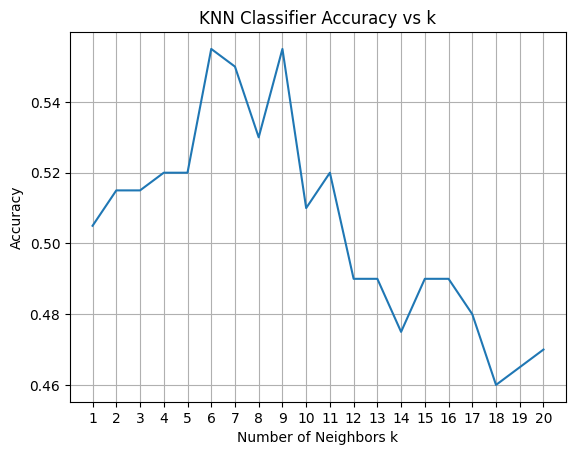

In [8]:
accuracy_list = []
# trying different values of k to find the best one
for k in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    accuracy = model.score(X_val, y_val)
    accuracy_list.append((k, accuracy))

# finding the best k
best_k, best_accuracy = max(accuracy_list, key=lambda x: x[1])
print(f"Best k: {best_k} with accuracy: {best_accuracy:.2f}")

# lets plot the accuracy vs k
import matplotlib.pyplot as plt
k_values, accuracies = zip(*accuracy_list)
plt.plot(k_values, accuracies)
plt.xlabel('Number of Neighbors k')
plt.ylabel('Accuracy')
plt.title('KNN Classifier Accuracy vs k')
plt.xticks(k_values)
plt.grid()
plt.show()

In [12]:
# test the model on the test set
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(   X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.525